In [3]:
import random
import numpy as np


def create_world(height,width,percent):    
    numbers = np.random.uniform(0,1,height*width)
    for index,value in enumerate(numbers):
        if value >= (100-percent)/100:
            numbers[index] = 1
        else:
            numbers[index] = 0
    return [round(x) for x in numbers]

def draw_world(list2d):
    print("Generation:",gen_number)
    print("")
    list2d = [[p if p !=0 else '.' for p in s] for s in list2d]
    list2d = [[p if p !=1 else '#' for p in s] for s in list2d]
    for row in list2d:
        for col in row:
            print(col, end = "")
        print()
    print("")
    print("")

def nest_list(list1,rows, columns):    
        result=[]               
        start = 0
        end = columns
        for i in range(rows): 
            result.append(list1[start:end])
            start +=columns
            end += columns
        return result

def cellular_automata():
    for row in range(h):
        for col in range(w):
            if 5 <= info[row][col]['ones_around'] >= 7  :
                info[row][col]['change'] = 1

def apply_changes():
    for row in range(h):
        for col in range(w):
            world[row][col] = info[row][col]['change']

def world_info(arr):
    world_info = []

    for i in range(len(arr)):
        for j, value in enumerate(arr[i]):
            if i == 0 or i == len(arr) - 1 or j == 0 or j == len(arr[i]) - 1:
                # corners
                new_neighbors = []
                if i != 0 and j != 0:
                    new_neighbors.append(arr[i - 1][j - 1]) 
                if i != 0:
                    new_neighbors.append(arr[i - 1][j])
                if i != 0 and j != len(arr[i]) - 1:
                    new_neighbors.append(arr[i - 1][j + 1])
                if j != len(arr[i]) - 1:
                    new_neighbors.append(arr[i][j + 1]) 
                if i != len(arr) - 1 and j != len(arr[i]) - 1:
                    new_neighbors.append(arr[i + 1][j + 1]) 
                if i != len(arr) - 1:
                    new_neighbors.append(arr[i + 1][j]) 
                if i != len(arr) - 1 and j != 0:
                    new_neighbors.append(arr[i + 1][j - 1])
                if j != 0:
                    new_neighbors.append(arr[i][j - 1])

            else:
                new_neighbors = [
                    arr[i - 1][j - 1],  
                    arr[i - 1][j],  
                    arr[i - 1][j + 1],  
                    arr[i][j + 1],  
                    arr[i + 1][j + 1],  
                    arr[i + 1][j],  
                    arr[i + 1][j - 1],
                    arr[i][j - 1] 
                ]
            non = 0
            for e in new_neighbors:
                if e == 1:
                    non = non + 1
                    
            change = arr[i][j]
            if arr[i][j] == 1:
                if non <= 2:
                   change = 0
                elif non >= 3:
                    pass
            elif arr[i][j] == 0:
                if non > 5:
                    change = 1
                elif non <= 5:
                    pass
            world_info.append({
                "index": (i,j),
                "value": value,
                "neighbors": new_neighbors,
                "ones_around": non,
                "change": change
                })
    return world_info


h = int(input("Map height: "))
w = int(input("Map width: "))
generations = int(input("How many generations: "))
land_percent = int(input("Percent of land (0-100 / recommended 40-60): "))
world = nest_list(create_world(h,w,land_percent),h,w)
gen_number = 0
print("")

for a in range(generations+1):
    draw_world(world)
    info = nest_list(world_info(world),h,w)        
    cellular_automata()
    apply_changes()
    gen_number += 1


Generation: 0

.#.#......###..#..##....#.##....##.#.#.#..#.#####....###.....##.#######..#.....#..#...##.#.#.#.##...
.###.#.....###.#.###.##.#.####...#......####..###..#.##.#..#.##...##...#.#..###.###..#..###.###....#
.###.#.#######..##..####.##.####..##.#...#.#.....#..####.#.######......###.#..##..###..#.#.##..##.##
......#..#.###..#.#..#..#.###..####.....##..##.#######.#...###.####.#..###..##.#.#.####..##.#.#.....
##.#.##....#.......####..#..####..#.#.######.#.##...#..###.##...#.#.#.....#.#..#..####.##.##...#.###
#..#.###..#...##.###..#.......#.#..#.#.#.#######..##..#...##....##.###.#.#.##.##.#.#..##..##.####.##
#.##.#.#..#.#.##.#...#######.##.####..#...#...#....###.####.#..#.##...#..##.####..##.##.#..##.###..#
..#####...#######.##.....###.#.###.#.###....##..###..#.##.#.#...#.#.#####.#...##.#...#.#.#.#..###..#
#...#.##.#.#####.#....###..#..###..#...#....#.##..#.#...#.......####.#...####....####.##.#..#.#.####
#######..####.#..###.###..#.####..#.###.#..#.##....###..#.#.#..##.##.###.#.

In [ ]:
## https://github.com/Kaluzhskaia/cellular-automata/blob/master/ca-terrain.py

C:\Users\ernan\AppData\Local\Temp\ipykernel_52380\1271085818.py:98: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, interval=50)
d:\books\cellular-automata-book\.env\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


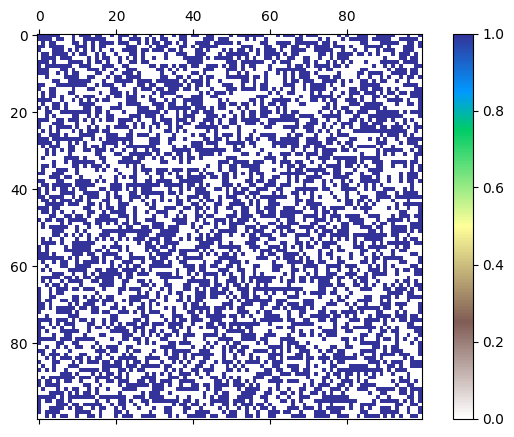

In [2]:
"""Simple creation of a smooth, random landscape by using a cellular automaton. The code is implemented in Python
and matplotlib. Initially, a random distribution of land and water tiles spawns. A CA then decides which cells turn
into water and which into land. This creates a smooth landscape with only land and water tiles. In the final step,
a heat diffusion algorithm averages over all tiles and blurs the boundaries between land and water to create beaches. Tiles can be made land by clicking and the animation can be controlled by the keyboard (spacebar to play/pause append the right arrow button to advance by one frame). The final result is a bit similar to a Perlin noise terrain."""

# first we import necessary packages: numpy (for arrays), pyplot and animation (for visualization)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# then we declare necessary global variables
rows = 100       # number of rows
cols = 100       # number of columns
land = 1.0       # value of a cell that is land
water = 0.0      # value of a water cell
pause = True     # pause flag
created = False  # flag for finishing formation
smoothing_steps = 2
counter = 0

# we create a random distribution of water and land tiles
cell = np.random.choice([land, water], size=(rows, cols))

# we need a function that updates the plot each frame
def update(*args):
    global counter
    if not pause and not created:
        advance()
    elif not pause and created and counter < smoothing_steps:
        smooth()
        counter += 1

# this is the main function that advances the animation by one frame (time step)
def advance():
    global created
    global cell
    # we create a new (actual) copy of all cell states
    newcell = cell.copy()
    # and then sum up the values of all neighboring cells
    for i in range(rows):
        for j in range(cols):
            total = (cell[i, (j - 1) % cols] + cell[i, (j + 1) % cols] + cell[(i - 1) % rows, j] + cell[(i + 1) % rows, j] + cell[(i - 1) % rows, (j - 1) % cols] + cell[(i - 1) % rows, (j + 1) % cols] + cell[(i + 1) % rows, (j - 1) % cols] + cell[(i + 1) % rows, (j + 1) % cols])
            # now comes the decision, if the cell should live in the next time step
            if cell[i, j] == land:
                if total < 4:
                    newcell[i, j] = water
            else:
                if total >= 5:
                    newcell[i, j] = land
    if (newcell == cell).all():
        created = True
        print("Formation stopped.")
    # the new cells are now the old cells and are returned
    grid.set_data(newcell)
    cell = newcell
    return [grid]

# now we smooth out the boundaries
def smooth(*args):
    global cell
    erosion = cell.copy()
    for i in range(rows):
        for j in range(cols):
            total = (cell[i, j] + cell[i, (j - 1) % cols] + cell[i, (j + 1) % cols] + cell[(i - 1) % rows, j] + cell[(i + 1) % rows, j] + cell[(i - 1) % rows, (j - 1) % cols] + cell[(i - 1) % rows, (j + 1) % cols] + cell[(i + 1) % rows, (j - 1) % cols] + cell[(i + 1) % rows, (j + 1) % cols])
            avg = np.sqrt(total/9.0)
            erosion[i, j] = avg
    grid.set_data(erosion)
    cell = erosion
    return [grid]

# this catches keyboard events (spacebar for play/pause, right arrow key for advancing one frame)
def press(event):
    global pause
    if event.key == " ":
        pause = not pause
        return pause
    elif event.key == "right":
        advance()

# catches mouseclick events for flipping states of cells
def click(event):
    if pause:
        global cell
        if isinstance(event.xdata, float) and isinstance(event.ydata, float):
            j = int(round(event.xdata))
            i = int(round(event.ydata))
            cell[i, j] = 1.0
            grid.set_data(cell)
    return grid

# plot and animation commands
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot()
grid = ax.matshow(cell, cmap="terrain_r")
fig.canvas.mpl_connect('key_press_event', press)
fig.canvas.mpl_connect('button_press_event', click)
fig.colorbar(grid)
ani = animation.FuncAnimation(fig, update, interval=50)
plt.show()